In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import joblib

import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
df=pd.read_csv("/content/drive/MyDrive/ml602/dynamic_supply_chain_logistics_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

In [4]:
df.isnull().sum()

,0
timestamp,0
vehicle_gps_latitude,0
vehicle_gps_longitude,0
fuel_consumption_rate,0
eta_variation_hours,0
traffic_congestion_level,0
warehouse_inventory_level,0
loading_unloading_time,0
handling_equipment_availability,0
order_fulfillment_status,0


In [5]:
df.describe()

,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,...,historical_demand,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,delivery_time_deviation
count,32065.000000,32065.000000,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,3.206500e+04,32065.000000,3.206500e+04,...,32065.000000,32065.000000,3.206500e+04,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,32065.000000,32065.000000
mean,38.023589,-90.116648,8.011735,2.893068,4.991493e+00,2.992547e+02,2.291669,3.026954e-01,0.600740,4.976082e-01,...,6022.001286,0.044792,2.972816e-01,7.001144,2.296448,4.983913e-01,6.008723e-01,0.803656,0.699077,5.177648
std,6.917909,17.369244,4.264960,2.274044,3.532048e+00,3.234435e+02,1.554202,3.259146e-01,0.345672,3.532853e-01,...,3427.638017,14.187486,3.216115e-01,3.236328,1.555932,3.541589e-01,3.458101e-01,0.279185,0.324514,4.157988
min,30.000000,-119.999998,5.000000,-1.999993,1.091633e-09,1.322210e-12,0.500000,4.565769e-16,0.000001,4.536949e-09,...,100.002966,-10.000000,7.255415e-19,0.000050,0.500000,4.043927e-09,3.269508e-07,0.000048,0.000003,-1.999998
25%,31.280550,-106.253913,5.019984,1.185744,1.474720e+00,1.605163e+01,0.774798,1.710828e-02,0.277096,1.440135e-01,...,2822.607616,-9.931074,1.678269e-02,4.593407,0.776166,1.443567e-01,2.783148e-01,0.693739,0.456009,1.269197
50%,36.413820,-86.293414,5.636036,3.882059,4.981244e+00,1.572880e+02,1.917121,1.595151e-01,0.680553,4.961781e-01,...,6785.123209,-7.858681,1.549760e-01,8.385605,1.938273,4.988468e-01,6.831130e-01,0.958128,0.839599,6.113662
75%,44.453655,-73.079367,9.669944,4.884355,8.534902e+00,5.405980e+02,3.734188,5.535954e-01,0.938160,8.498226e-01,...,9374.252913,6.024012,5.405408e-01,9.836152,3.750817,8.510762e-01,9.372889e-01,0.998746,0.982391,9.249206
max,50.000000,-70.000000,19.999875,5.000000,9.999999e+00,9.999993e+02,5.000000,9.999995e-01,1.000000,1.000000e+00,...,10000.000000,39.999886,1.000000e+00,10.000000,5.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,10.000000


In [6]:
df.columns

Index(['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude',
       'fuel_consumption_rate', 'eta_variation_hours',
       'traffic_congestion_level', 'warehouse_inventory_level',
       'loading_unloading_time', 'handling_equipment_availability',
       'order_fulfillment_status', 'weather_condition_severity',
       'port_congestion_level', 'shipping_costs', 'supplier_reliability_score',
       'lead_time_days', 'historical_demand', 'iot_temperature',
       'cargo_condition_status', 'route_risk_level', 'customs_clearance_time',
       'driver_behavior_score', 'fatigue_monitoring_score',
       'disruption_likelihood_score', 'delay_probability',
       'risk_classification', 'delivery_time_deviation'],
      dtype='object')

In [7]:
df["delivery_time_deviation"] = df["delivery_time_deviation"].round(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

In [8]:
# Convert timestamp to datetime and extract datetime features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.weekday


In [9]:
df = df.drop(columns=['timestamp'])

In [10]:
# Encode 'risk_classification'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['risk_classification'] = le.fit_transform(df['risk_classification'])


In [11]:
# Drop raw GPS features
df = df.drop(columns=['vehicle_gps_latitude', 'vehicle_gps_longitude'])

In [12]:
#Split the dataset

X = df.drop(columns=['delivery_time_deviation'])
y = df['delivery_time_deviation']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

In [15]:
# Model and Grid Search
!pip install xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]},
             scoring='r2', verbose=1)

In [16]:
# Best model and performance
print("✅ Best Parameters:", grid_search.best_params_)

✅ Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


In [17]:

# Evaluate the model


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)



In [18]:

print("\n📊 Tuned Model Evaluation:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


📊 Tuned Model Evaluation:
MSE: 17.250338790178258
R² Score: 0.0002906195149290358


In [19]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

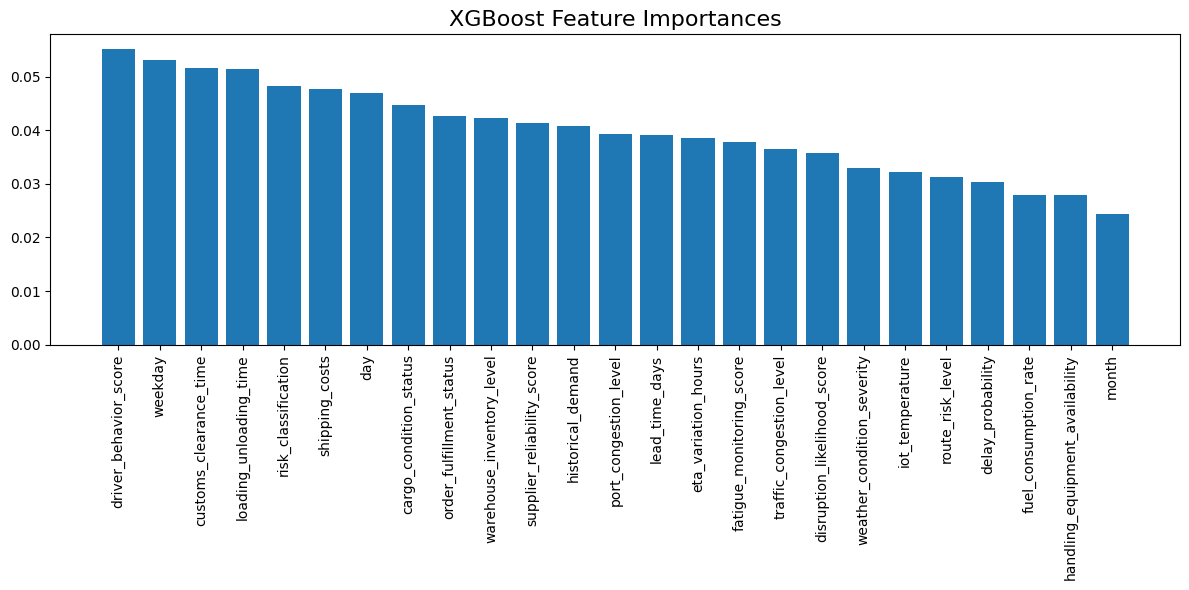

In [20]:
plt.figure(figsize=(12, 6))
plt.title("XGBoost Feature Importances", fontsize=16)
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# Trying a classification approach

In [21]:

# Create binary target: 1 if delayed, 0 if on-time or early
df['delayed'] = (df['delivery_time_deviation'] > 0).astype(int)
df = df.drop(columns=['delivery_time_deviation'])

In [22]:
# Split data into train/test sets
# -----------------------------
X = df.drop(columns=['delayed'])
y = df['delayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
# Train logistic regression
# -----------------------------
model = LogisticRegression(max_iter=1000, class_weight='balanced')

model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [24]:
# Evaluate the model
# -----------------------------
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [25]:
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ ROC-AUC Score:", roc_auc_score(y_test, y_prob))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.48      0.26      1152
           1       0.82      0.51      0.63      5261

    accuracy                           0.50      6413
   macro avg       0.50      0.49      0.44      6413
weighted avg       0.70      0.50      0.56      6413


🧾 Confusion Matrix:
[[ 549  603]
 [2578 2683]]

✅ ROC-AUC Score: 0.49721021035291135


# trying tree based models to handle imbalanced data well
## 1. Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
# Train Random Forest Classifier
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [28]:
# Evaluate the model
# -----------------------------
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ ROC-AUC Score:", roc_auc_score(y_test, y_prob))



📊 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1152
           1       0.82      1.00      0.90      5261

    accuracy                           0.82      6413
   macro avg       0.41      0.50      0.45      6413
weighted avg       0.67      0.82      0.74      6413


🧾 Confusion Matrix:
[[   0 1152]
 [   0 5261]]

✅ ROC-AUC Score: 0.4878595145884813


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##  The data is highly imbalanced and it is hard for models, it has completely ignored class 0 (on-time deliveries): Using SMOTE (Synthetic Minority Oversampling Technique)

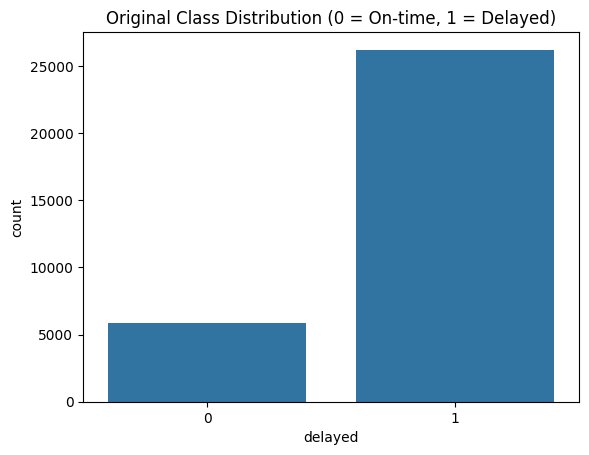

In [29]:
# -----------------------------
# Visualize class imbalance
# -----------------------------
sns.countplot(x='delayed', data=df)
plt.title("Original Class Distribution (0 = On-time, 1 = Delayed)")
plt.show()

In [30]:
# -----------------------------
# Apply SMOTE to balance classes
# -----------------------------
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

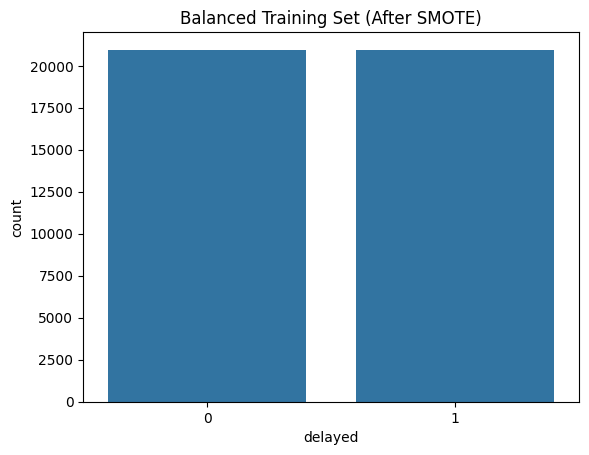

In [31]:

# Visualize balanced class distribution
sns.countplot(x=y_train_bal)
plt.title("Balanced Training Set (After SMOTE)")
plt.show()

In [32]:
# -----------------------------
# Train Random Forest
# -----------------------------
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

In [33]:
# -----------------------------
# Evaluate the model
# -----------------------------
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

In [34]:
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ ROC-AUC Score:", roc_auc_score(y_test, y_prob))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.07      0.10      1152
           1       0.82      0.92      0.87      5261

    accuracy                           0.77      6413
   macro avg       0.49      0.50      0.48      6413
weighted avg       0.70      0.77      0.73      6413


🧾 Confusion Matrix:
[[  81 1071]
 [ 411 4850]]

✅ ROC-AUC Score: 0.5058547962998163


## change in target variable , risk-classification is our new target variable.  multi-class classification using all 3 classes in risk_classification: High Risk, Medium Risk, and Low Risk.

In [35]:
 # Encode risk_classification target
le = LabelEncoder()
df['risk_label'] = le.fit_transform(df['risk_classification'])  # e.g. 0 = High, 1 = Low, 2 = Medium
class_names = le.classes_  # Store class labels before dropping
df.drop(columns=['risk_classification'], inplace=True)

In [36]:
# -----------------------------
# Define features and target
# -----------------------------
X = df.drop(columns=['risk_label'])
y = df['risk_label']

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [38]:
# Logistic Regression
# -----------------------------
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
print("\n📊 Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))


📊 Logistic Regression:
Accuracy: 0.747699984406674


TypeError: object of type 'numpy.int64' has no len()

In [41]:
# -----------------------------
# Random Forest Classifier
# -----------------------------
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [44]:
print("\n🌲 Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


🌲 Random Forest Classifier:
Accuracy: 1.0


TypeError: object of type 'numpy.int64' has no len()

## The above model is clearly overfitting

### check for target leakage

In [45]:
# If 'timestamp' is still in the DataFrame, drop or convert it
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Optionally extract features
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday

# Drop original timestamp if still present as string
df = df.drop(columns=['timestamp'])

# Now compute correlation only on numeric columns
correlation = df.select_dtypes(include='number').corr()
correlation['risk_label'].sort_values(ascending=False)

KeyError: 'timestamp'

In [46]:
df.corr()['risk_label'].sort_values(ascending=False)

,risk_label
risk_label,1.000000
order_fulfillment_status,0.012395
month,0.007211
iot_temperature,0.006554
warehouse_inventory_level,0.004095
delayed,0.003970
shipping_costs,0.003154
traffic_congestion_level,0.002982
day,0.002971
historical_demand,0.001289


### Classification apporach as risk classification the target column


In [54]:
df=pd.read_csv("/content/drive/MyDrive/ml602/dynamic_supply_chain_logistics_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

In [55]:
df_clean = df.drop(columns=["timestamp"])

In [56]:
# Step 2: Encode the target variable
le = LabelEncoder()
df_clean["risk_classification_encoded"] = le.fit_transform(df_clean["risk_classification"])
df_clean = df_clean.drop(columns=["risk_classification"])


In [57]:
# Step 2: Encode the target variable
df_clean


,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,delivery_time_deviation,risk_classification_encoded
0,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,0.359066,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,9.110682,2
1,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,0.230660,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,8.175281,0
2,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,0.027210,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,1.283594,0
3,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,0.616619,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,9.304897,0
4,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,0.952385,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,7.752484,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32060,48.496665,-104.031158,5.421806,4.394370,0.192421,127.684977,3.607803,0.208643,0.992997,0.792648,...,-8.835069,0.199377,9.893402,0.966050,0.109571,0.511074,0.953467,0.916745,5.506049,0
32061,34.670137,-89.893091,10.624778,2.700635,8.736143,84.638889,1.218165,0.472389,0.946031,0.034156,...,-2.517654,0.673775,0.854378,1.665889,0.530289,0.868418,0.995329,0.808963,-1.876938,0
32062,42.963338,-82.149873,5.071596,0.485288,7.420200,48.500920,4.999149,0.064366,0.437687,0.022338,...,29.410878,0.949644,4.480552,0.690990,0.537100,0.896798,0.442299,0.959197,9.790219,2
32063,32.082410,-70.070154,5.000000,4.759411,0.932050,972.437425,0.505242,0.250949,0.517051,0.782338,...,-6.951137,0.407377,9.185549,4.462204,0.012896,0.463018,0.999999,0.557340,9.956879,0


In [58]:
# Step 3: Split features and target
X = df_clean.drop(columns=["risk_classification_encoded"])
y = df_clean["risk_classification_encoded"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Step 5: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Step 6: Optional PCA (for logistic regression and visualization)
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [63]:
# Step 7: Train models
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
from sklearn.ensemble import GradientBoostingClassifier # Import the classf
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [67]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000)

In [68]:
# Step 8: Evaluate models
rf_preds = rf.predict(X_test)
gb_preds = gb.predict(X_test)
lr_preds = lr.predict(X_test_pca)

In [69]:
results = {
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rf_preds),
        "Report": classification_report(y_test, rf_preds, target_names=le.classes_),
        "Confusion Matrix": confusion_matrix(y_test, rf_preds)
    },
    "Gradient Boosting": {
        "Accuracy": accuracy_score(y_test, gb_preds),
        "Report": classification_report(y_test, gb_preds, target_names=le.classes_),
        "Confusion Matrix": confusion_matrix(y_test, gb_preds)
    },
    "Logistic Regression (with PCA)": {
        "Accuracy": accuracy_score(y_test, lr_preds),
        "Report": classification_report(y_test, lr_preds, target_names=le.classes_),
        "Confusion Matrix": confusion_matrix(y_test, lr_preds)
    }
}

In [70]:
for model, metrics in results.items():
    print(f"\n{model} - Accuracy: {metrics['Accuracy']:.4f}")
    print(metrics['Report'])
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])


Random Forest - Accuracy: 1.0000
               precision    recall  f1-score   support

    High Risk       1.00      1.00      1.00      4764
     Low Risk       1.00      1.00      1.00       641
Moderate Risk       1.00      1.00      1.00      1008

     accuracy                           1.00      6413
    macro avg       1.00      1.00      1.00      6413
 weighted avg       1.00      1.00      1.00      6413

Confusion Matrix:
 [[4764    0    0]
 [   0  641    0]
 [   0    0 1008]]

Gradient Boosting - Accuracy: 1.0000
               precision    recall  f1-score   support

    High Risk       1.00      1.00      1.00      4764
     Low Risk       1.00      1.00      1.00       641
Moderate Risk       1.00      1.00      1.00      1008

     accuracy                           1.00      6413
    macro avg       1.00      1.00      1.00      6413
 weighted avg       1.00      1.00      1.00      6413

Confusion Matrix:
 [[4764    0    0]
 [   0  641    0]
 [   0    0 1008]]

Log

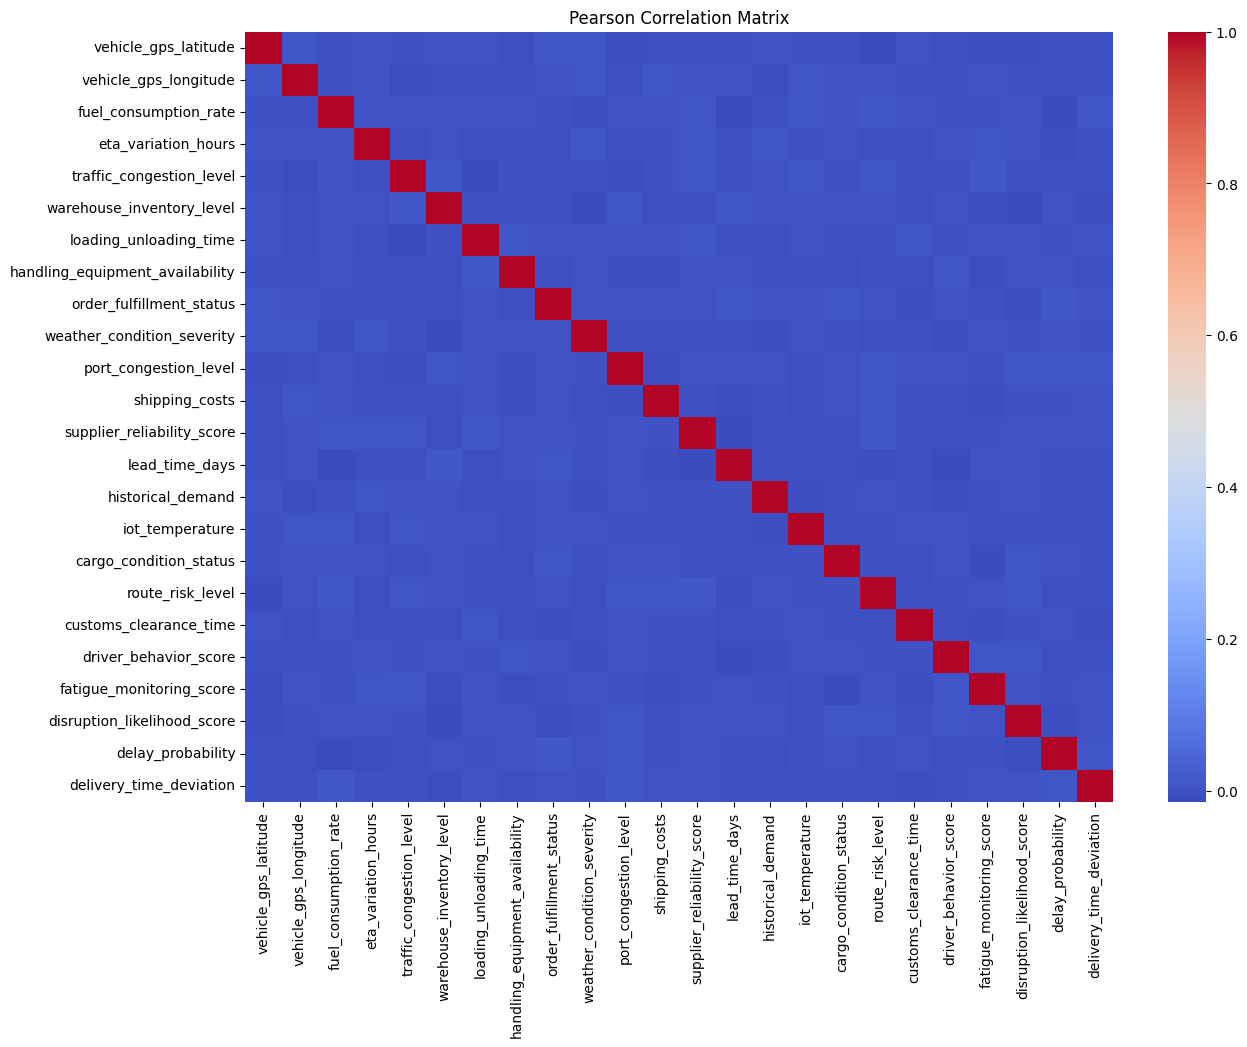

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop target and non-numeric columns
numeric_df = df.select_dtypes(include=["float64"])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(method='pearson'), annot=False, cmap='')
plt.title("Pearson Correlation Matrix")
plt.show()

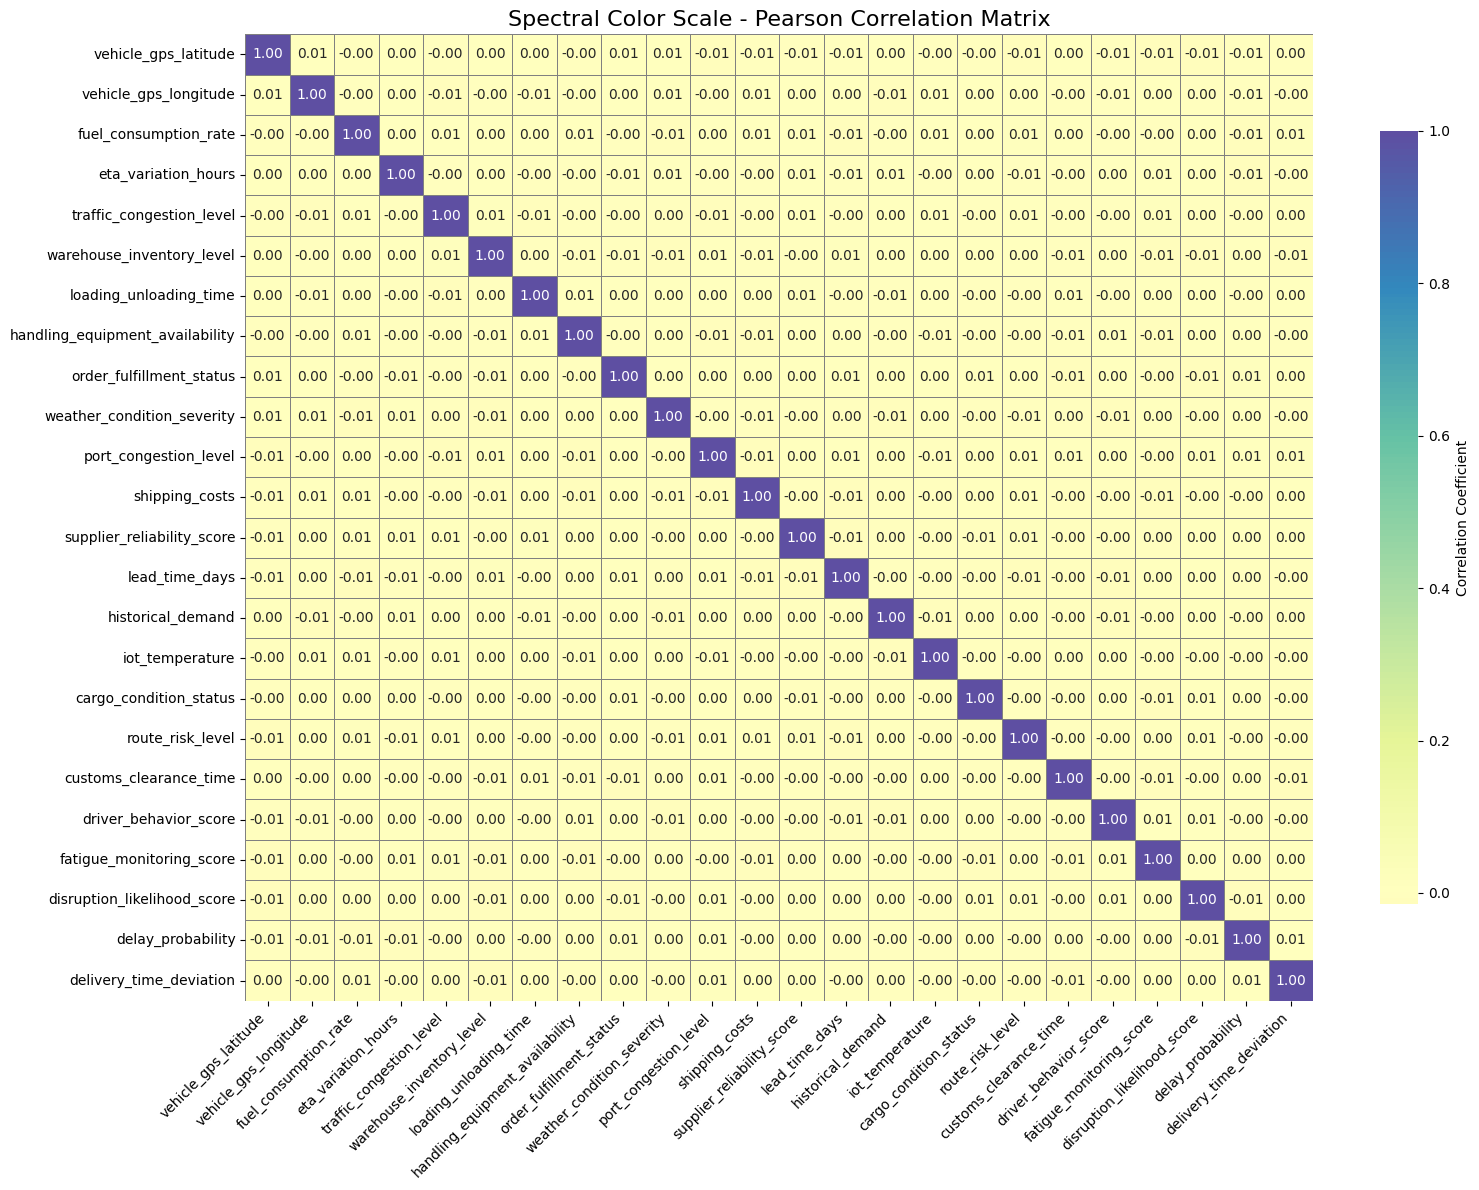

In [73]:
# Try another enhanced color palette for better visual clarity
import seaborn as sns
import matplotlib.pyplot as plt

# Drop target and non-numeric columns
numeric_df = df.select_dtypes(include=["float64"])

# Calculate correlation matrix (this was missing)
corr_matrix = numeric_df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Spectral",  # Vibrant diverging color scale
    center=0,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)
plt.title("Spectral Color Scale - Pearson Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## instead of using PCA , WE try to use SelectKBest features and Polynomial features

In [82]:
## selectKbest features
from sklearn.feature_selection import SelectKBest, f_classif

# Use all features with SelectKBest (same as no reduction, but standardized interface)
selector_all = SelectKBest(score_func=f_classif, k='all')
X_train_all = selector_all.fit_transform(X_train_scaled, y_train)
X_test_all = selector_all.transform(X_test_scaled)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_all, y_train)
print("Accuracy:", model.score(X_test_all, y_test))


Accuracy: 0.9984406673943552


In [80]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LogisticRegression(max_iter=1000)
model.fit(X_poly, y_train)
print("Accuracy:", model.score(X_test_poly, y_test))


Accuracy: 0.9917355371900827


In [74]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

# Define parameter distribution
param_dist = {
    'C': loguniform(1e-4, 1e4),     # Regularization strength
    'penalty': ['l2'],             # Can add 'none' or 'elasticnet' with solver='saga'
    'solver': ['lbfgs', 'liblinear'],
}


In [75]:
# Create randomized search
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_distributions=param_dist,
    n_iter=20,                # Number of combinations to try
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [76]:
# Fit on PCA-transformed data
random_search.fit(X_train_pca, y_train)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dde84c00610>,
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear']},
                   random_state=42, scoring='accuracy')

In [77]:

# Best model and params
print("Best parameters:", random_search.best_params_)
print("Best cross-validated accuracy:", random_search.best_score_)

Best parameters: {'C': np.float64(6.155564318973028), 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated accuracy: 0.78087490212571


## Selecting top 5 features

In [123]:
# selectKbest features
from sklearn.feature_selection import SelectKBest, f_classif

# Use all features with SelectKBest (same as no reduction, but standardized interface)
selector_top5 = SelectKBest(score_func=f_classif, k=5)
X_train_all = selector_all.fit_transform(X_train_scaled, y_train)
X_test_all = selector_all.transform(X_test_scaled)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_all, y_train)

print("Accuracy:", model.score(X_test_all, y_test))

Accuracy: 0.9990644004366132


In [126]:
selector_top5 = SelectKBest(score_func=f_classif, k=5)
selector_top5.fit(X_train_scaled, y_train)
top5_feature_names = X.columns[selector_top5.get_support()]
top5_feature_names.tolist()

['warehouse_inventory_level',
 'order_fulfillment_status',
 'weather_condition_severity',
 'cargo_condition_status',
 'disruption_likelihood_score']

In [117]:
# Train RidgeClassifierCV
from sklearn.linear_model import RidgeClassifierCV
ridge_cv_all = RidgeClassifierCV(class_weight='balanced', cv=5)
ridge_cv_all.fit(X_train_all, y_train)

RidgeClassifierCV(class_weight='balanced', cv=5)

In [118]:
# Predict and evaluate
ridge_all_preds = ridge_cv_all.predict(X_test_all)
ridge_all_acc = accuracy_score(y_test, ridge_all_preds)
ridge_all_report = classification_report(y_test, ridge_all_preds, target_names=le.classes_)
ridge_all_cm = confusion_matrix(y_test, ridge_all_preds)

ridge_all_acc, ridge_all_report, ridge_all_cm

(0.8476532044285046,
 '               precision    recall  f1-score   support\n\n    High Risk       0.91      1.00      0.95      4764\n     Low Risk       0.56      1.00      0.71       641\nModerate Risk       1.00      0.03      0.06      1008\n\n     accuracy                           0.85      6413\n    macro avg       0.82      0.68      0.58      6413\n weighted avg       0.89      0.85      0.79      6413\n',
 array([[4764,    0,    0],
        [   0,  641,    0],
        [ 465,  512,   31]]))

In [92]:
joblib.dump(model, "ridge_classifier_model.pkl")

['ridge_classifier_model.pkl']

In [93]:

joblib.dump(selector, "feature_selector.pkl")


['feature_selector.pkl']

In [94]:

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

### select top 5 features


In [128]:
!pip install streamlit

from pathlib import Path

# Generate Streamlit code using top 5 features
streamlit_code_top5 = '''
import streamlit as st
import numpy as np
import joblib

# Load saved models
model = joblib.load("ridge_classifier_model.pkl")
scaler = joblib.load("scaler.pkl")
selector = joblib.load("feature_selector.pkl")

# Define input fields
st.title("Supply Chain Risk Classifier (Top 5 Features)")

st.write("Enter the following logistics parameters:")

features = [
    "warehouse_inventory_level",
    "order_fulfillment_status",
    "weather_condition_severity",
    "cargo_condition_status",
    "disruption_likelihood_score"
]

user_input = []
for feature in features:
    value = st.number_input(f"{feature.replace('_', ' ').capitalize()}", format="%.4f")
    user_input.append(value)

if st.button("Predict Risk"):
    X = np.array(user_input).reshape(1, -1)
    X_scaled = scaler.transform(X)
    X_selected = selector.transform(X_scaled)
    prediction = model.predict(X_selected)[0]

    risk_labels = {0: "High Risk", 1: "Low Risk", 2: "Moderate Risk"}
    st.success(f"Predicted Risk Classification: **{risk_labels[prediction]}**")
'''

# Save to file
streamlit_top5_file = Path("/content/app_top5.py")
streamlit_top5_file.write_text(streamlit_code_top5)

streamlit_top5_file.name

'app_top5.py'

## Streamlit/ model deployment

In [129]:
%%writefile app.py

# app.py
import joblib
import streamlit as st
import numpy as np

# Load model, scaler, and selector
model = joblib.load("ridge_classifier_model.pkl")
scaler = joblib.load("scaler.pkl")
selector = joblib.load("feature_selector.pkl")

st.title("Supply Chain Risk Classifier")

Overwriting app.py


In [130]:
%%writefile app.py
# Example input fields
inputs = []
inputs.append(st.number_input("Fuel Consumption Rate"))
inputs.append(st.number_input("ETA Variation (Hours)"))

Overwriting app.py


In [131]:

%%writefile app.py
if st.button("Predict Risk"):
    X = np.array(inputs).reshape(1, -1)
    X_scaled = scaler.transform(X)
    X_selected = selector.transform(X_scaled)
    pred = model.predict(X_selected)
    risk_map = {0: "High Risk", 1: "Low Risk", 2: "Moderate Risk"}
    st.success(f"Predicted Risk: {risk_map[pred[0]]}")

Overwriting app.py


In [132]:
%%writefile app.py
streamlit run app.py

Overwriting app.py


In [133]:
%%writefile app.py



Overwriting app.py


In [134]:
# app.py
import joblib
import streamlit as st
import numpy as np

# Load model, scaler, and selector
model = joblib.load("ridge_classifier_model.pkl")
scaler = joblib.load("scaler.pkl")
selector = joblib.load("feature_selector.pkl")

st.title("Supply Chain Risk Classifier")

# Example input fields
inputs = []
inputs.append(st.number_input("Fuel Consumption Rate"))
inputs.append(st.number_input("ETA Variation (Hours)"))

if st.button("Predict Risk"):
    X = np.array(inputs).reshape(1, -1)
    X_scaled = scaler.transform(X)
    X_selected = selector.transform(X_scaled)
    pred = model.predict(X_selected)
    risk_map = {0: "High Risk", 1: "Low Risk", 2: "Moderate Risk"}
    st.success(f"Predicted Risk: {risk_map[pred[0]]}")

2025-04-16 07:05:33.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 07:05:33.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 07:05:33.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 07:05:33.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 07:05:33.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 07:05:33.814 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 07:05:33.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 07:05:33.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar